INTRODUCTION

The Heart Disease Dataset is a collection of medical data from patients who have undergone various diagnostic tests to detect heart disease. The dataset contains information on several features such as age, sex, cholesterol level, blood pressure, and the presence of various symptoms.

IMPORTING ALL THE ESSENTIAL LIBRARIES FOR DATA ANALYSIS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

DATA GATHERING

In [ ]:
data = pd.read_csv("/content/heartdisease.csv")        

# Reading the csv file

DATA CLEANING

BASIC DATA EXPLORATION

In [ ]:
data.head()     # First Five Rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Unnamed: 14
0,63,Male,3,145.0,233,1,0,150,0,2.3,0,0.0,1,1.0,Male
1,37,Male,2,130.0,250,0,1,187,0,3.5,0,0.0,2,1.0,Male
2,41,Female,1,130.0,204,0,0,172,0,1.4,2,0.0,2,1.0,Female
3,56,Male,1,120.0,236,0,1,178,0,0.8,2,0.0,2,1.0,Male
4,57,Female,0,120.0,354,0,1,163,1,0.6,2,0.0,2,1.0,Female


In [ ]:
data.tail()      # Last Five Rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Unnamed: 14
298,57,Female,0,140.0,241,0,1,123,1,0.2,1,0.0,3,0.0,Female
299,45,Male,3,110.0,264,0,1,132,0,1.2,1,0.0,3,0.0,Male
300,68,Male,0,144.0,193,1,1,141,0,3.4,1,2.0,3,0.0,Male
301,57,Male,0,130.0,131,0,1,115,1,1.2,1,1.0,3,0.0,Male
302,57,Female,1,130.0,236,0,0,174,0,0.0,1,1.0,2,0.0,Female


In [ ]:
data.sample()    # Random Sample from Entire Population

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Unnamed: 14
149,42,Male,2,130.0,180,0,1,150,0,0.0,2,0.0,2,1.0,Male


In [ ]:
data.shape       # Gives the no of Rows and Columns in the dataset

(303, 15)

In [ ]:
data.dtypes      # Gives the Datatype of particular column

age             object
sex             object
cp              object
trestbps       float64
chol             int64
fbs              int64
restecg          int64
thalach          int64
exang            int64
oldpeak        float64
slope            int64
ca             float64
thal             int64
target         float64
Unnamed: 14     object
dtype: object

In [ ]:
data.info()      # Gives the Datatype aswell as null values present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    object 
 1   sex          303 non-null    object 
 2   cp           303 non-null    object 
 3   trestbps     302 non-null    float64
 4   chol         303 non-null    int64  
 5   fbs          303 non-null    int64  
 6   restecg      303 non-null    int64  
 7   thalach      303 non-null    int64  
 8   exang        303 non-null    int64  
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    int64  
 11  ca           140 non-null    float64
 12  thal         303 non-null    int64  
 13  target       301 non-null    float64
 14  Unnamed: 14  303 non-null    object 
dtypes: float64(4), int64(7), object(4)
memory usage: 35.6+ KB


In [ ]:
data.describe()   # Gives the statistical values of the dataset (we can even include categorical values using include = 'ALL' but that doesnot make sense)

,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,140.000000,303.000000,301.000000
mean,131.556291,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.914286,2.313531,0.548173
std,17.527818,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.121957,0.612277,0.498503
min,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,2.000000,3.000000,1.000000
max,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.duplicated().sum()   # To check how many records are duplicated

1

In [ ]:
duplicate = data[data.duplicated()]
print("This is the duplicate record present in the Dataset")     # to check which row is Duplicated
duplicate

This is the duplicate record present in the Dataset


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Unnamed: 14
164,38,Male,2,138.0,175,0,1,173,0,0.0,2,4.0,2,1.0,Male


BOXPLOT TO CHECK ARE THERE ANY OUTLIERS

<Axes: ylabel='chol'>

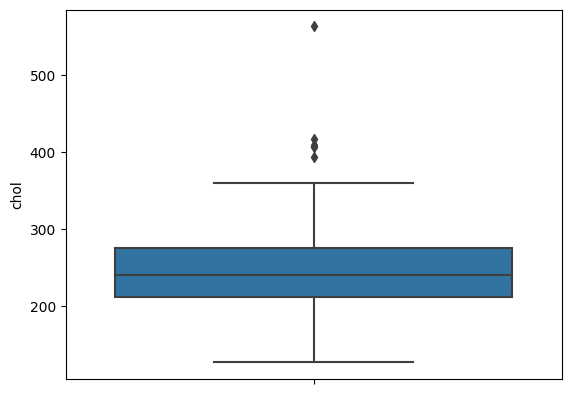

In [ ]:
sns.boxplot( y=data["chol"] )

<Axes: ylabel='trestbps'>

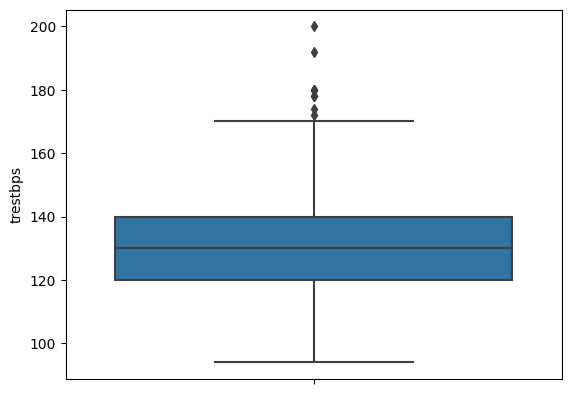

In [ ]:
sns.boxplot( y=data["trestbps"] )

<Axes: ylabel='fbs'>

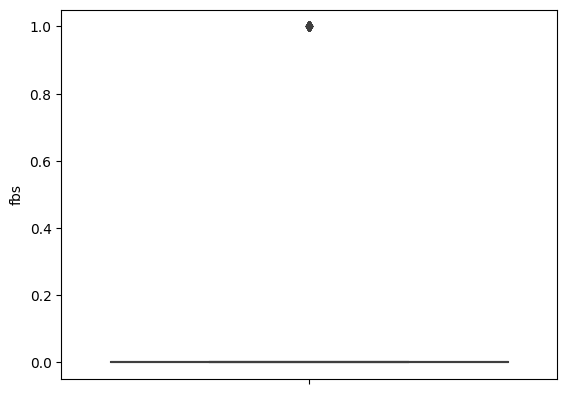

In [ ]:
sns.boxplot( y=data["fbs"] )

<Axes: ylabel='restecg'>

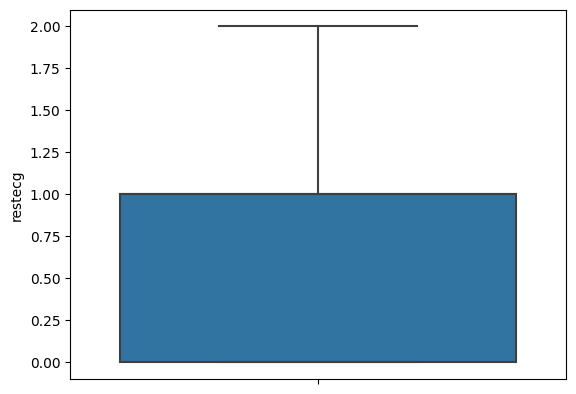

In [ ]:
sns.boxplot( y=data["restecg"] )

<Axes: ylabel='thalach'>

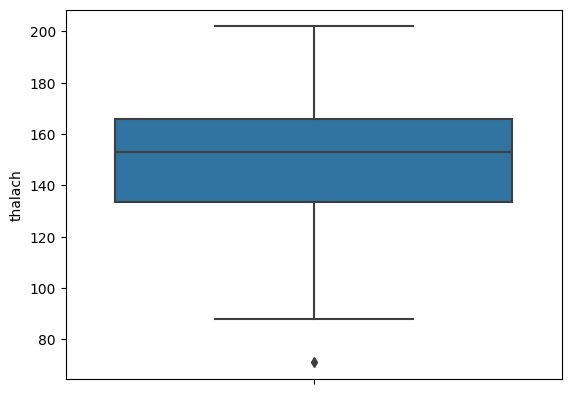

In [ ]:
sns.boxplot( y=data["thalach"] )

<Axes: ylabel='exang'>

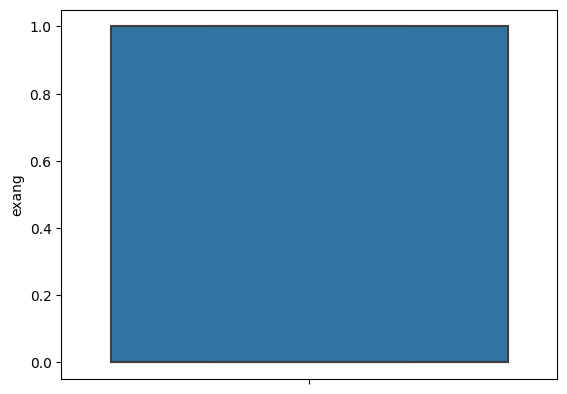

In [ ]:
sns.boxplot( y=data["exang"] )

<Axes: ylabel='oldpeak'>

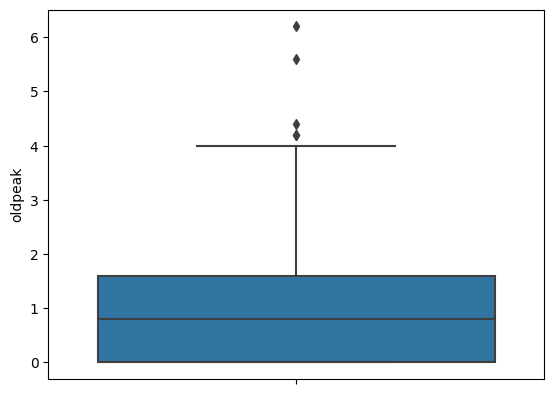

In [ ]:
sns.boxplot( y=data["oldpeak"] )

<Axes: ylabel='slope'>

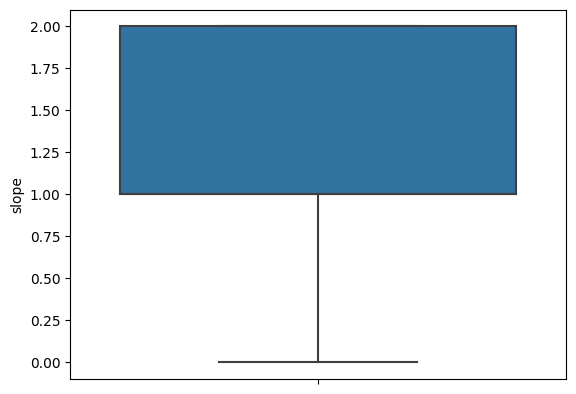

In [ ]:
sns.boxplot( y=data["slope"] )

<Axes: ylabel='ca'>

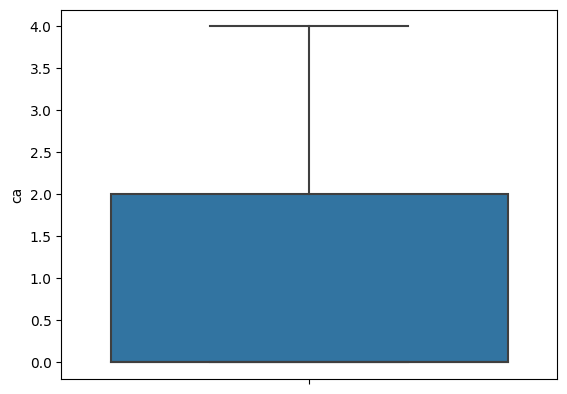

In [ ]:
sns.boxplot( y=data["ca"] )

<Axes: ylabel='thal'>

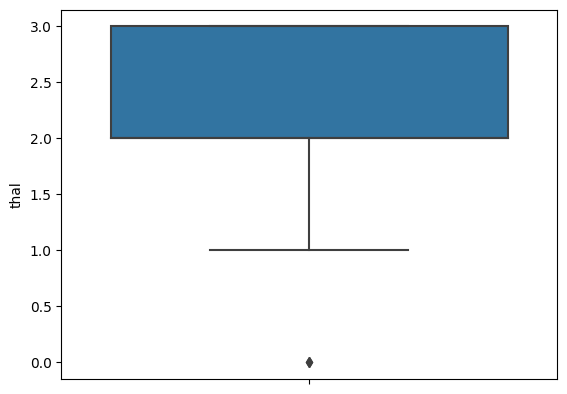

In [ ]:
sns.boxplot( y=data["thal"] )

<Axes: ylabel='target'>

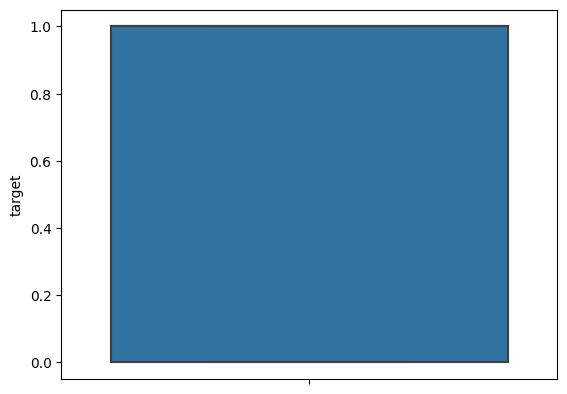

In [ ]:
sns.boxplot( y=data["target"] )

INSIGHTS FROM THE BASIC DATA EXPLORATION : 

1)  The Data is inconsistent as there are many null values present in certain columns

2)  Imputation might be required based on no of null values present

3)  There is one Duplicate record present in the Data

4)  Datatype of Object(categorical) is present, if we are doing Basic Data Exploration there's no problem but if the data is further used in Machine Learning predictions then we need to perform encoding techniques as ML models will not be able to use categorical data

5) There are some outliers present in the data and based upon the situation we need to do outlier treatment

6) some columns Datatypes needs to be in numerical format instead they are in categorical format

7) There is a GENDER column present two times so we need to check and analyze whether it is same or different based upon the result we need to conclude to remove or keep it up.

USING MISSINGNO TO GET BAR CHART OF NULL VALUES

<Axes: >

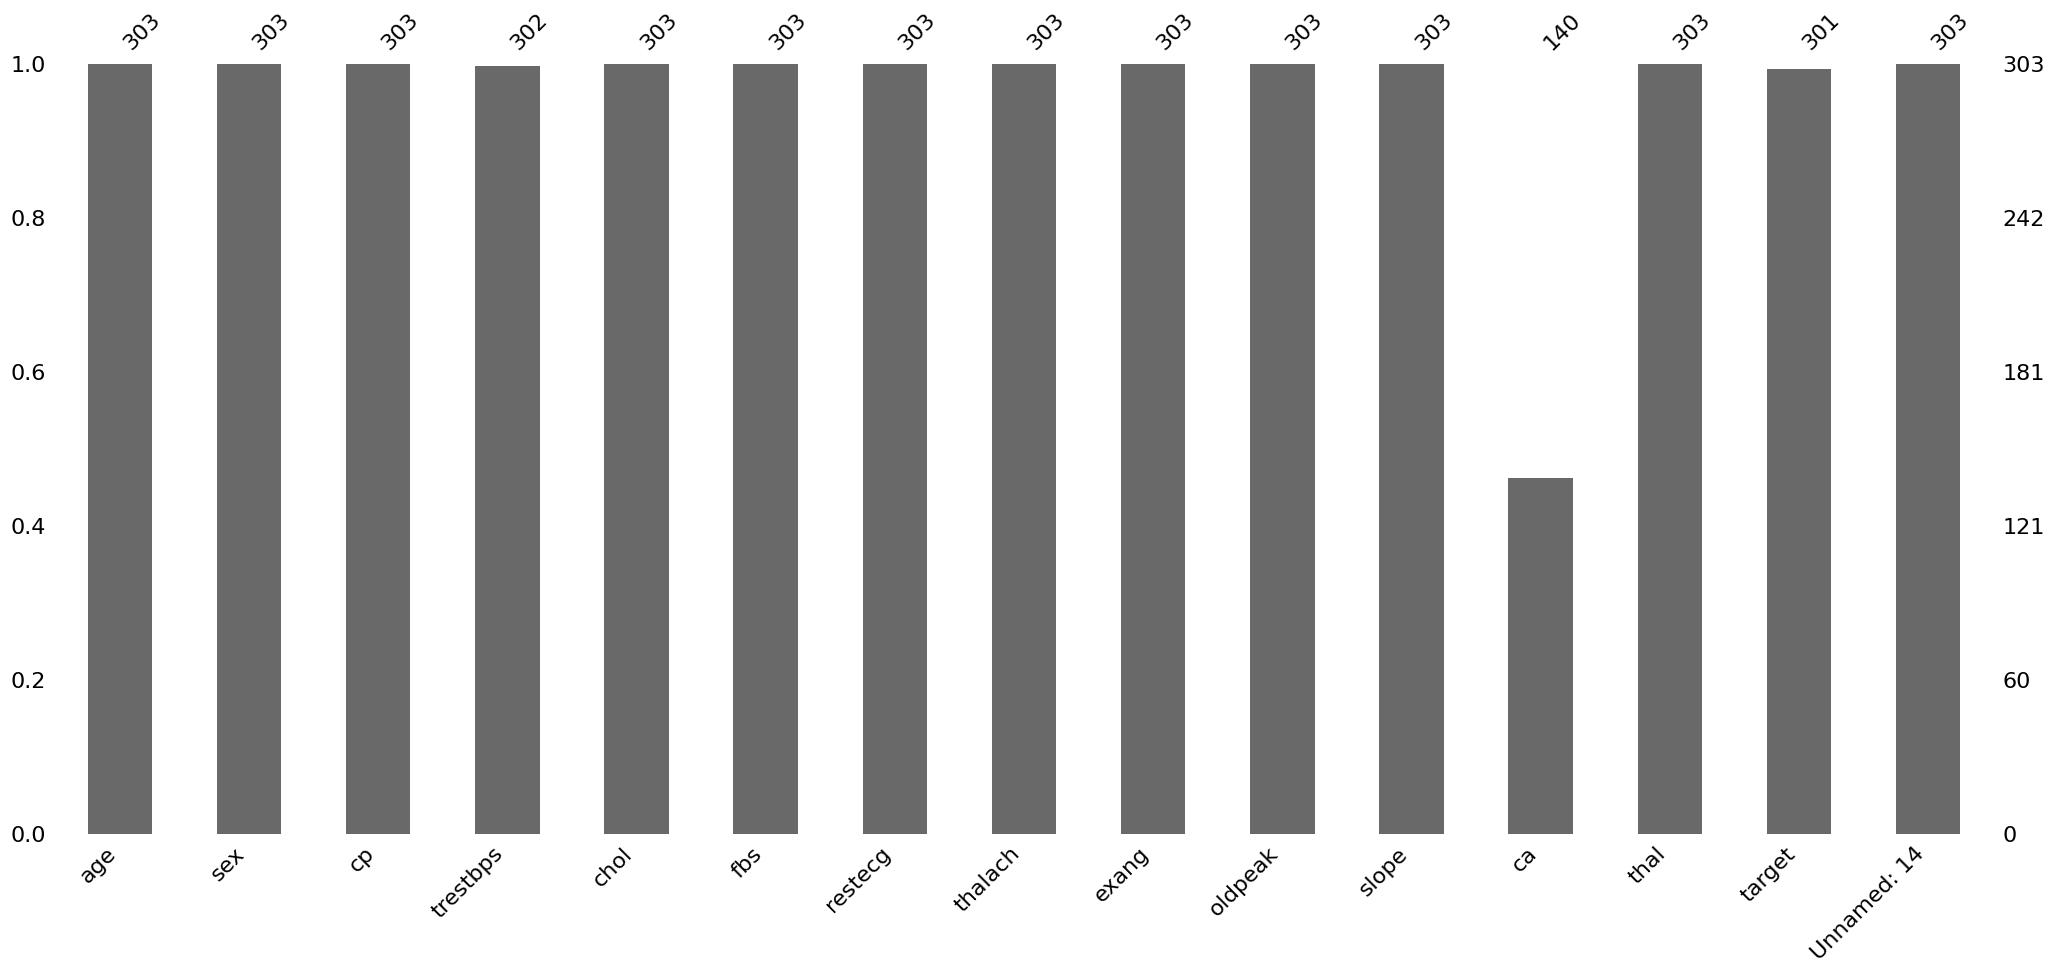

In [ ]:
ms.bar(data)

In [ ]:
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Unnamed: 14
0,63,Male,3,145.0,233,1,0,150,0,2.3,0,0.0,1,1.0,Male
1,37,Male,2,130.0,250,0,1,187,0,3.5,0,0.0,2,1.0,Male


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    object 
 1   sex          303 non-null    object 
 2   cp           303 non-null    object 
 3   trestbps     302 non-null    float64
 4   chol         303 non-null    int64  
 5   fbs          303 non-null    int64  
 6   restecg      303 non-null    int64  
 7   thalach      303 non-null    int64  
 8   exang        303 non-null    int64  
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    int64  
 11  ca           140 non-null    float64
 12  thal         303 non-null    int64  
 13  target       301 non-null    float64
 14  Unnamed: 14  303 non-null    object 
dtypes: float64(4), int64(7), object(4)
memory usage: 35.6+ KB


In [ ]:
# From the above observation AGE and CP columns are in categorical format but we need to typecast them to integer format so ML models can work upon the cleaned data

In [ ]:
data['age'] = pd.to_numeric(data['age'],errors='coerce')

In [ ]:
data['cp'] = pd.to_numeric(data['cp'],errors = 'coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          302 non-null    float64
 1   sex          303 non-null    object 
 2   cp           302 non-null    float64
 3   trestbps     302 non-null    float64
 4   chol         303 non-null    int64  
 5   fbs          303 non-null    int64  
 6   restecg      303 non-null    int64  
 7   thalach      303 non-null    int64  
 8   exang        303 non-null    int64  
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    int64  
 11  ca           140 non-null    float64
 12  thal         303 non-null    int64  
 13  target       301 non-null    float64
 14  Unnamed: 14  303 non-null    object 
dtypes: float64(6), int64(7), object(2)
memory usage: 35.6+ KB


In [ ]:
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Unnamed: 14
0,63.0,Male,3.0,145.0,233,1,0,150,0,2.3,0,0.0,1,1.0,Male
1,37.0,Male,2.0,130.0,250,0,1,187,0,3.5,0,0.0,2,1.0,Male


In [ ]:
# now we have cleaned the data by converting the categorical format to integer format

<Axes: >

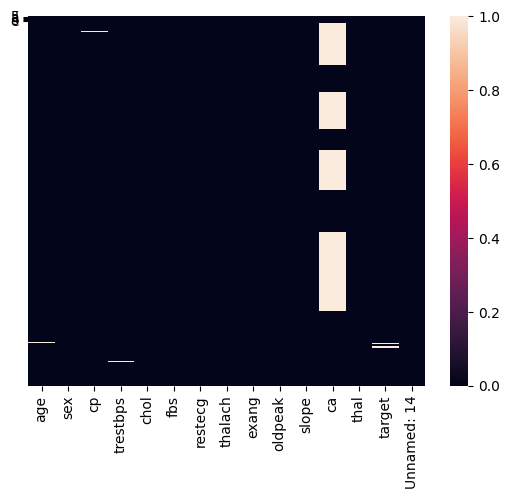

In [ ]:
sns.heatmap(data.isnull(),yticklabels = 'False')

In [ ]:
'''
From the the above Heatmap we can clearly see that more than 50 percentage in "ca" column are having Null values present,
so in this case i will drop the column bcoz especially in health care domain the accuracy of the machine learning is  playing huge role so just by imputing 
the missing values with(mean,median,mode,knn etc) wont suffice so i am going ahead with dropping the column.
'''

'\nFrom the the above Heatmap we can clearly see that more than 50 percentage in "ca" column are having Null values present,\nso in this case i will drop the column bcoz especially in health care domain the accuracy of the machine learning is  playing huge role so just by imputing \nthe missing values with(mean,median,mode,knn etc) wont suffice so i am going ahead with dropping the column.\n'

In [ ]:
data.drop('ca',axis = 1,inplace = True)

In [ ]:
data.isnull().sum()

age            1
sex            0
cp             1
trestbps       1
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
thal           0
target         2
Unnamed: 14    0
dtype: int64

In [ ]:
# In remaining columns the null values are present but not that significant, so I am moving forward with some imputation methods

AGE

In [ ]:
data['age'].mean()

53.97682119205298

In [ ]:
data['age'].median()

55.0

In [ ]:
data['age'].mode()

0    58.0
Name: age, dtype: float64

In [ ]:
data['age'].fillna(55.0,inplace = True)  # As mean is sensitive to outliers I took median

CP

In [ ]:
data['cp'].mean()

0.9668874172185431

In [ ]:
data['cp'].median()

1.0

In [ ]:
data['cp'].mode()

0    0.0
Name: cp, dtype: float64

In [ ]:
data['cp'].value_counts()

0.0    143
2.0     87
1.0     49
3.0     23
Name: cp, dtype: int64

In [ ]:
data['cp'].fillna(0.0,inplace = True)  # mode = 0.0

trestbps(blood pressure)

In [ ]:
data['trestbps'].mean()

131.5562913907285

In [ ]:
data['trestbps'].median()

130.0

In [ ]:
data['trestbps'].mode()

0    120.0
Name: trestbps, dtype: float64

In [ ]:
data['trestbps'].fillna(130.0,inplace = True)  # imputed with median value

TARGET

In [ ]:
data['target'].mean()

0.5481727574750831

In [ ]:
data['target'].median()

1.0

In [ ]:
data['target'].mode()

0    1.0
Name: target, dtype: float64

In [ ]:
data['target'].fillna(1.0,inplace = True)

CROSS VERIFYING WITH THE HEATMAP

<Axes: >

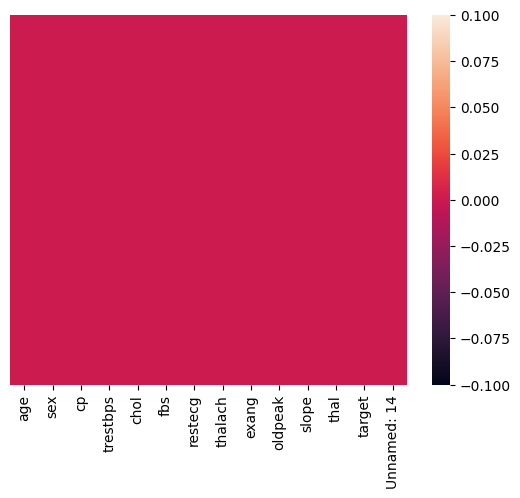

In [ ]:
sns.heatmap(data.isnull(),yticklabels = False)

In [ ]:
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target,Unnamed: 14
0,63.0,Male,3.0,145.0,233,1,0,150,0,2.3,0,1,1.0,Male
1,37.0,Male,2.0,130.0,250,0,1,187,0,3.5,0,2,1.0,Male


In [ ]:
# By checking the data (head,tail,sample etc) visually we can see that both sex and unnamed : 14 columns are having same data but for further accuracy as below

In [ ]:
compare_columns = lambda x : x['sex'] == x['Unnamed: 14']
result = data.apply(compare_columns,axis = 1)
print(result)

0      True
1      True
2      True
3      True
4      True
       ... 
298    True
299    True
300    True
301    True
302    True
Length: 303, dtype: bool


In [ ]:
cnt = result.value_counts()

In [ ]:
cnt

True    303
dtype: int64

SO FROM ABOVE LAMBDA FUNCTION WE CAN CLEARLY SEE THAT ALL ARE TRUE THAT MEANS WE ARE HAVING A DUPLICATE COLUMN SO WE CAN DROP THAT PARTICULAR DUPLICATE COLUMN

In [ ]:
data.drop('Unnamed: 14', axis = 1, inplace = True)

In [ ]:
data.info()      # just cross checking for the deletion of that particular column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    object 
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  thal      303 non-null    int64  
 12  target    303 non-null    float64
dtypes: float64(5), int64(7), object(1)
memory usage: 30.9+ KB


In [ ]:
data['sex'].value_counts()

Male      207
Female     96
Name: sex, dtype: int64

<ipython-input-75-3bfd48591725>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidth=3)


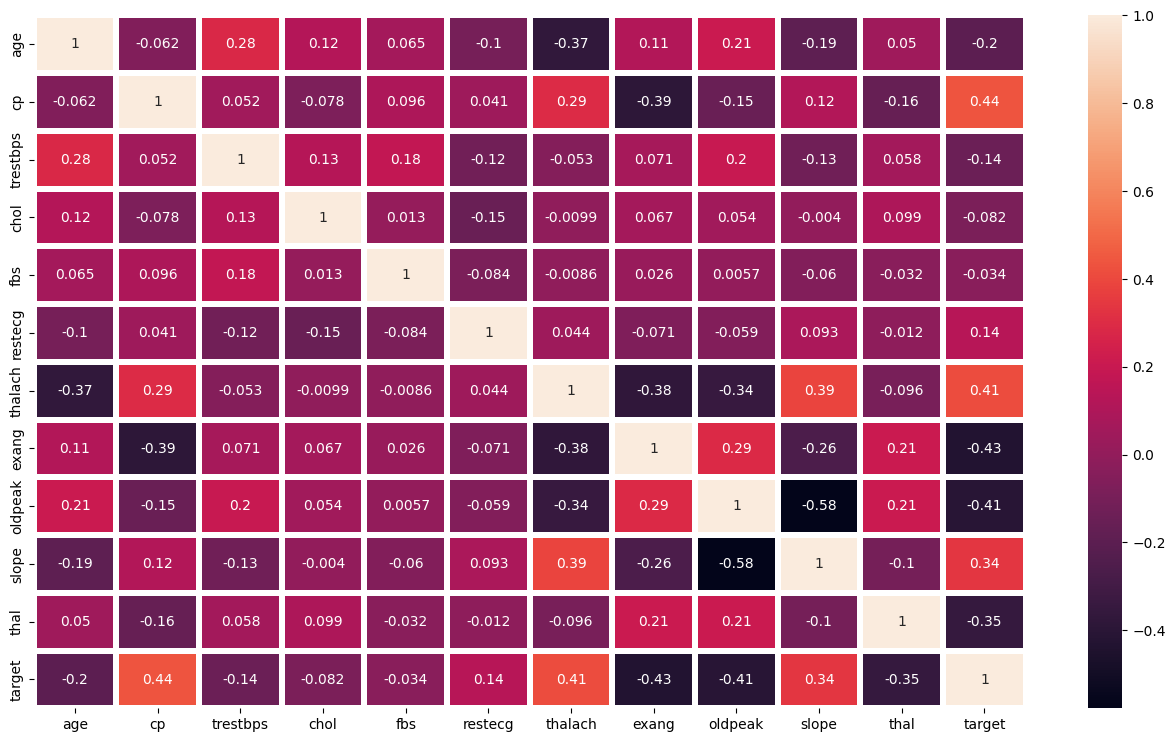

In [ ]:
# correlation (shows how correlated the particular features are correlated with each other)

plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot=True, linewidth=3)
plt.show()

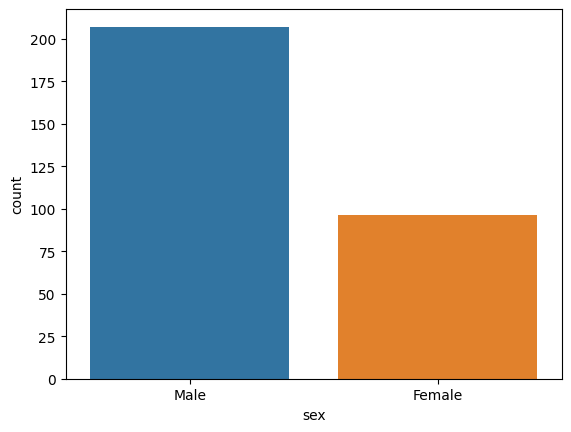

In [ ]:
sns.countplot(x=data.sex)
plt.show()                   # males are more in number compared to that of females in this dataset

In [ ]:
for i in data['sex']:
  if i == "Male":
    print(0)
  else:
    print(1)

0
0
1
0
1
0
1
0
0
0
0
1
0
0
1
1
1
1
0
1
0
0
0
0
0
1
0
0
1
0
1
0
0
0
0
1
1
0
1
1
1
0
0
1
0
0
0
0
1
1
1
0
0
1
1
0
0
0
0
1
1
0
0
0
0
1
0
1
0
1
0
0
0
0
1
1
0
0
0
0
0
0
1
0
1
1
0
0
1
1
0
0
0
1
1
0
1
0
0
0
0
0
1
0
0
1
0
1
1
1
1
0
1
0
0
1
0
0
1
1
1
0
1
1
1
1
0
1
1
1
1
1
0
0
1
1
1
0
0
0
1
0
1
1
1
0
1
1
0
0
0
1
0
1
1
1
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
1
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
1
0
1
0
0
0
1


In [ ]:
data['sex'] = pd.to_numeric(data['sex'],errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       0 non-null      float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  thal      303 non-null    int64  
 12  target    303 non-null    float64
dtypes: float64(6), int64(7)
memory usage: 30.9 KB


IN THIS PARTICULAR DATASET I HAVE NOT USED DATA VISUALIZATION EXTENSIEVLY AS MY MANY MOTTO IS TO CLEAN THE RAW DATA AND CONVERT IT INTO MORE USABLE FORMAT WHERE WE CAN USE IT FOR MACHINE LEARNING MODELS

CREATING A NEW DATASET(CSV FILE) WHICH WAS IN CLEANED FORMAT

In [ ]:
data.to_csv("heart_data_cleaned.csv",index = False)